# Homework I

### Grupo 003

(ist1107028) Inês Paredes

(ist1107137) Margarida Lourenço


## II. Programming [9v]

Consider the diabetes.arff data available at the homework tab, comprising 8 biological
features to classify 768 patients into 2 classes (normal, diabetes).

**1) [1v] ANOVA is a statistical test that can be used to assess the discriminative power of a
single input variable. Using f_classif from sklearn, identify the input variables with the
worst and best discriminative power. Plot their class-conditional probability density
functions.**

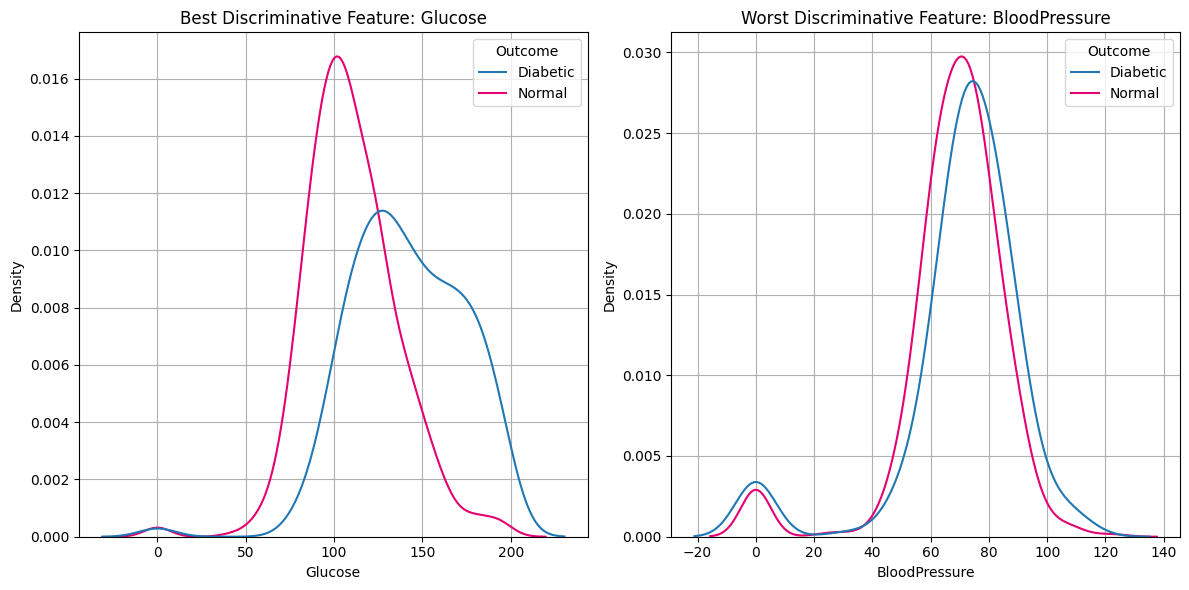

In [62]:
import pandas as pd, seaborn as sns, matplotlib.pyplot as plt
from scipy.io.arff import loadarff
from sklearn.feature_selection import f_classif

# Load the dataset
data = loadarff('./diabetes.arff')
df = pd.DataFrame(data[0])

# Separate features and target variable
df["Outcome"] = df["Outcome"].str.decode("utf-8")
X, y = df.drop("Outcome", axis=1), df["Outcome"]
df["Outcome"] = df["Outcome"].map({'1': 'Diabetic', '0': 'Normal'})

# Apply f_classif
f_values, p_values = f_classif(X, y)

# Find best and worst discriminative features
best_feature = X.columns[f_values.argmax()]
worst_feature = X.columns[f_values.argmin()]

plt.figure(figsize=(12, 6))
custom_palette = ["#1f77b4", "#E40071"]

# Plot for the best discriminative features
plt.subplot(1, 2, 1)
sns.kdeplot(data=df, x=best_feature, hue='Outcome', 
            fill=False, common_norm=False, palette=custom_palette)
plt.title(f'Best Discriminative Feature: {best_feature}')
plt.grid(True)

# Plot for the worst discriminative features
plt.subplot(1, 2, 2)
sns.kdeplot(data=df, x=worst_feature, hue='Outcome', 
            fill=False, common_norm=False, palette=custom_palette)
plt.title(f'Worst Discriminative Feature: {worst_feature}')
plt.grid(True)

plt.tight_layout()
plt.show()

As we can see from the graphic above:

  - The variable with the best discriminative power is **Glucose**: It's visible that the distribution for "Diabetic" (blue line) has a significant shift compared to "Normal" (pink line), showing that glucose levels are a strong differentiating factor between the two classes.
  
  - The variable with the worst discriminative power is **BloodPressure**: The distributions for both "Diabetic" and "Normal" classes overlap significantly, meaning this feature doesn't separate the two classes well.


**2) [4v] Using a stratified 80-20 training-testing split with a fixed seed (random_state=1),
assess in a single plot both the training and testing accuracies of a decision tree with
minimum sample split in {2, 5, 10, 20, 30, 50, 100} and the remaining parameters as default.**

*[optional] Note that split thresholding of numeric variables in decision trees is non-
deterministic in sklearn, hence you may opt to average the results using 10 runs per
parameterization.*

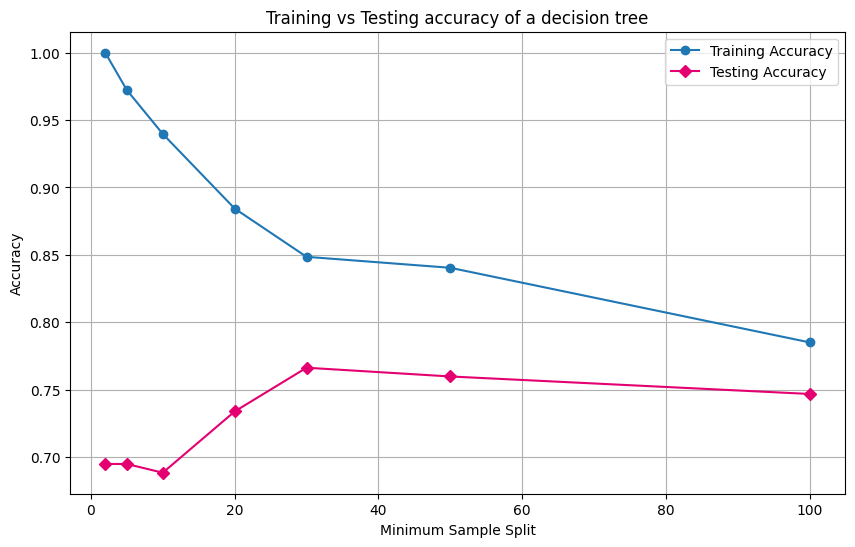

In [53]:
import pandas as pd, matplotlib.pyplot as plt
from scipy.io.arff import loadarff
from sklearn import metrics, tree
from sklearn.model_selection import train_test_split

# Load the dataset
data = loadarff('./diabetes.arff')
df = pd.DataFrame(data[0])

# Separate features and target variable
df["Outcome"] = df["Outcome"].str.decode("utf-8")
X, y = df.drop("Outcome", axis=1), df["Outcome"]
df["Outcome"] = df["Outcome"].map({'1': 'Diabetic', '0': 'Normal'})

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=1)
min_samples_splits = [2, 5, 10, 20, 30, 50, 100]
train_acc, test_acc = [], []

for min_samples in min_samples_splits:
    predictor = tree.DecisionTreeClassifier(min_samples_split=min_samples, random_state=1)
    predictor.fit(X_train, y_train)

    # Calculate training and testing accuracy
    train_acc.append(metrics.accuracy_score(y_train, predictor.predict(X_train)))
    test_acc.append(metrics.accuracy_score(y_test, predictor.predict(X_test)))

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(
    min_samples_splits, 
    train_acc, 
    label='Training Accuracy', 
    marker='o',
)
plt.plot(
    min_samples_splits, 
    test_acc, 
    label='Testing Accuracy', 
    marker='D',
    color='#E40071'
)
plt.xlabel('Minimum Sample Split')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training vs Testing accuracy of a decision tree')
plt.grid(True)
plt.show()

**3) [2v] Critically analyze these results, including the generalization capacity across settings.**

As shown in the graph above, increasing the min_samples_split parameter leads to a roughly 20% decrease in accuracy. This is expected because higher values of min_samples_split result in simpler trees, which reduces the model’s ability to fit the training data accurately.

Regarding testing accuracy, we observe a slight initial decrease, indicating overfitting (high training accuracy but low testing accuracy). As min_samples_split increases, testing accuracy improves, reaching 75%-80%, which indicates better generalization. Beyond this point, testing accuracy slightly declines, suggesting the model is becoming underfit due to the tree’s reduced complexity.

In terms of generalization, we can observe:

- ***Underfitting* for higher min_samples_split**, since both training and testing accuracy drop. This indicates the model is becoming too simplistic and fails to capture the underlying patterns in the data, leading to underfitting.

- **Optimal Generalization around 20-30 min_samples_split values**, where testing accuracy peaks, balancing bias and variance. The model complexity is reduced enough to avoid overfitting while retaining predictive power.

- ***Overfitting* at Low min_samples_split**, since The model fits the training data perfectly but performs poorly on test data, indicating poor generalization to new, unseen data.

The ideal minimal sample split appears to be around 30, which is the point in the graphic where the testing acurracy reaches it's maximum, striking a balance between model complexity and generalization to new data. This would help us prevent the model from being to minimalistic (*underfitting*) or overly complex (*overfitting*).

**4) [2v] To deploy the predictor, a healthcare provider opted to learn a single decision tree
(random_state=1) using all available data and ensuring that the maximum depth would be 3
in order to avoid overﬁtting risks.**

**i. Plot the decision tree.**

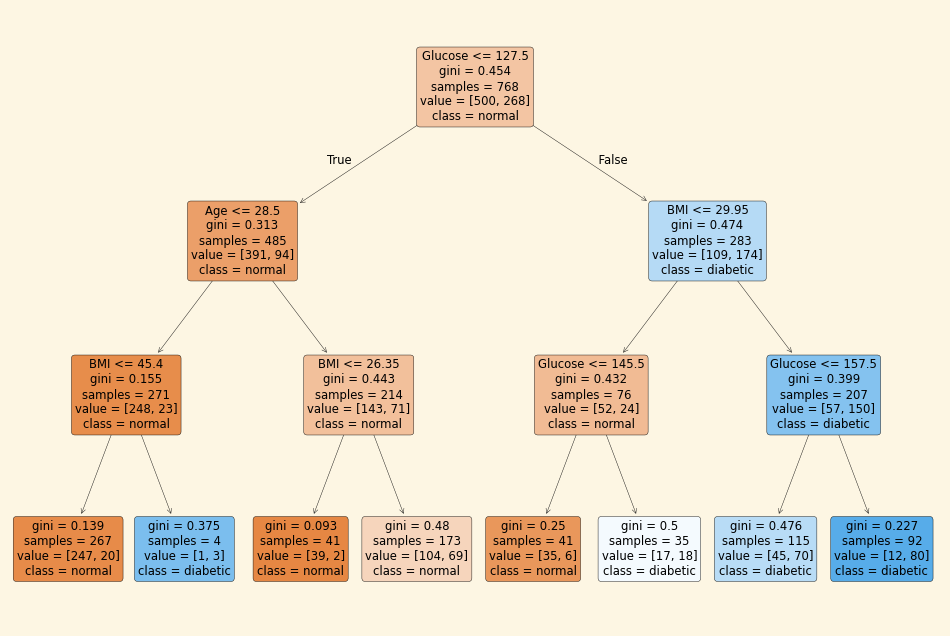

In [39]:
import matplotlib.pyplot as plt, pandas as pd
from scipy.io.arff import loadarff
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Load the dataset
data = loadarff('./diabetes.arff')
df = pd.DataFrame(data[0])

# Separate features and target variable
df["Outcome"] = df["Outcome"].str.decode("utf-8")
X, y = df.drop("Outcome", axis=1), df["Outcome"]

# Create and train the decision tree classifier
tree = DecisionTreeClassifier(max_depth=3, random_state=1)
tree.fit(X, y)

# Plot the decision tree
plt.figure(figsize=(12, 8))
plot_tree(tree, feature_names=X.columns, class_names=['normal', 'diabetic'], 
          filled=True, rounded=True)
plt.show()

**ii. Explain what characterizes diabetes by identifying the conditional associations
together with their posterior probabilities.**

The diabetic condition is characterized by:

- Glucose $<= 127.5$, Age $<= 28.5$ and BMI $>= 45.4$
- Glucose $>= 127.5$, and BMI $>= 29.95$
